In [49]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/date_sentiment3.csv',  encoding='ISO-8859-1')

#print the head
df.head()

,created_at,sentimental_value,sentimental_values
0,2020-03-19,-0.027273,-27.273
1,2020-03-20,0.154944,154.944
2,2020-03-21,0.165089,165.089
3,2020-03-22,0.130557,130.557
4,2020-03-23,0.134809,134.809


In [50]:
df.isnull().sum()

created_at             0
sentimental_value     31
sentimental_values    31
dtype: int64

In [51]:
df.shape

(135, 3)

In [52]:
df.mean()

sentimental_value       0.129281
sentimental_values    121.839096
dtype: float64

In [53]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          135 non-null    object 
 1   sentimental_value   135 non-null    float64
 2   sentimental_values  135 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [54]:
df.isnull().sum()

created_at            0
sentimental_value     0
sentimental_values    0
dtype: int64

In [55]:
df.shape

(135, 3)

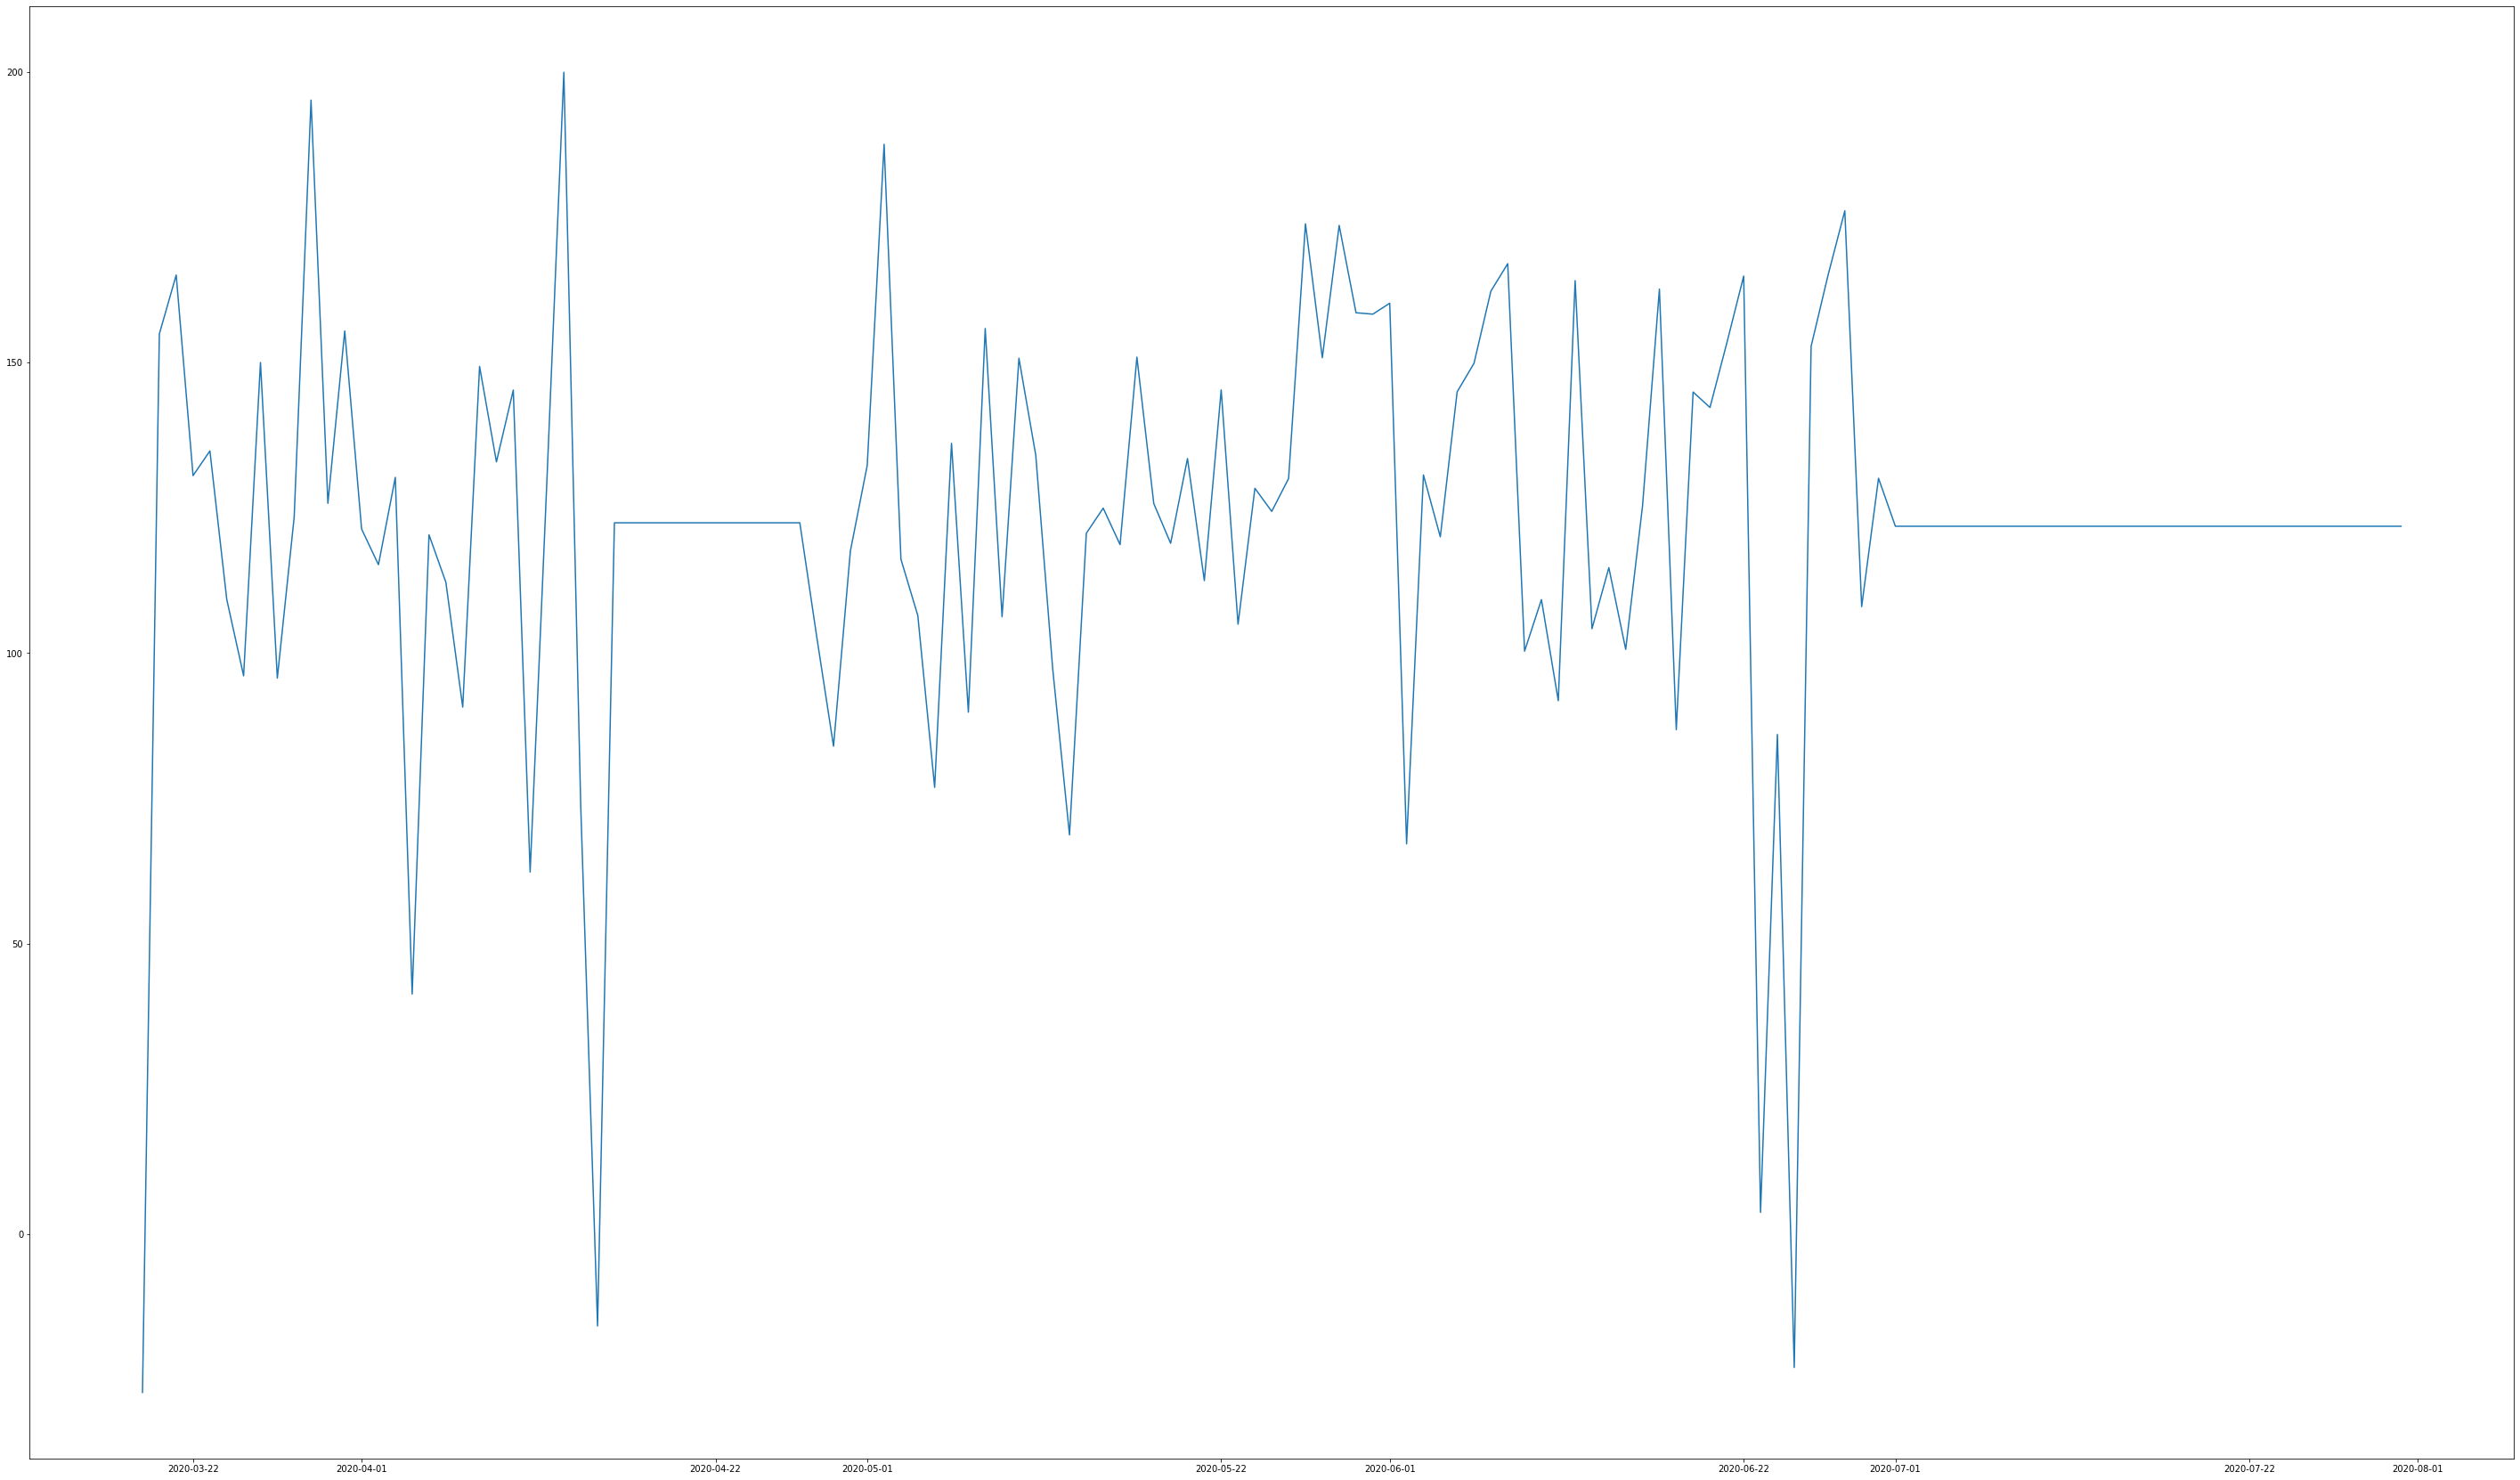

In [56]:
#setting index as date
df['created_at'] = pd.to_datetime(df.created_at,format='%Y-%m-%d')
df.index = df['created_at']

#plot
plt.figure(figsize=(50,30))
plt.plot(df['sentimental_values'], label='Close Price history')

In [57]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [58]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['created_at', 'sentimental_values'])
for i in range(0,len(data)):
    new_data['created_at'][i] = data['created_at'][i]
    new_data['sentimental_values'][i] = data['sentimental_values'][i]

In [59]:
new_data.index = new_data.created_at
new_data.drop('created_at', axis=1, inplace=True)

In [60]:
#creating train and test sets
dataset = new_data.values


In [61]:
train = dataset[0:97,:]
valid = dataset[97:,:]  

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [63]:
scaled_data

array([[0.        ],
       [0.80176795],
       [0.84640668],
       [0.69446339],
       [0.7131725 ],
       [0.60070225],
       [0.5428237 ],
       [0.78012839],
       [0.54103727],
       [0.66304687],
       [0.97890605],
       [0.67343984],
       [0.80405159],
       [0.65401353],
       [0.62698388],
       [0.69313457],
       [0.30178335],
       [0.64962665],
       [0.61366926],
       [0.51908091],
       [0.77717155],
       [0.70487396],
       [0.75925445],
       [0.39418926],
       [0.69239976],
       [1.        ],
       [0.44470649],
       [0.05034563],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.658726  ],
       [0.57269579],
       [0.48949043],
       [0.63736365],
       [0.70228672],
       [0.9454083 ],
       [0.63108475],
       [0.58849205],
       [0.458

In [64]:
x_train, y_train = [], []
for i in range(12,len(train)):
    x_train.append(scaled_data[i-12:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [65]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [66]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=15, batch_size=1, verbose=2)

Epoch 1/15
 - 1s - loss: 0.0609
Epoch 2/15
 - 1s - loss: 0.0246
Epoch 3/15
 - 1s - loss: 0.0324
Epoch 4/15
 - 1s - loss: 0.0300
Epoch 5/15
 - 1s - loss: 0.0267
Epoch 6/15
 - 1s - loss: 0.0291
Epoch 7/15
 - 1s - loss: 0.0248
Epoch 8/15
 - 1s - loss: 0.0274
Epoch 9/15
 - 1s - loss: 0.0266
Epoch 10/15
 - 1s - loss: 0.0274
Epoch 11/15
 - 1s - loss: 0.0248
Epoch 12/15
 - 1s - loss: 0.0268
Epoch 13/15
 - 1s - loss: 0.0261
Epoch 14/15
 - 1s - loss: 0.0261
Epoch 15/15
 - 1s - loss: 0.0254


In [67]:
inputs = new_data[len(new_data) - len(valid) - 12:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [68]:
inputs.shape

(50, 1)

In [69]:
X_test = []
for i in range(12,inputs.shape[0]):
    X_test.append(inputs[i-12:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [70]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

28.589999397464442

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


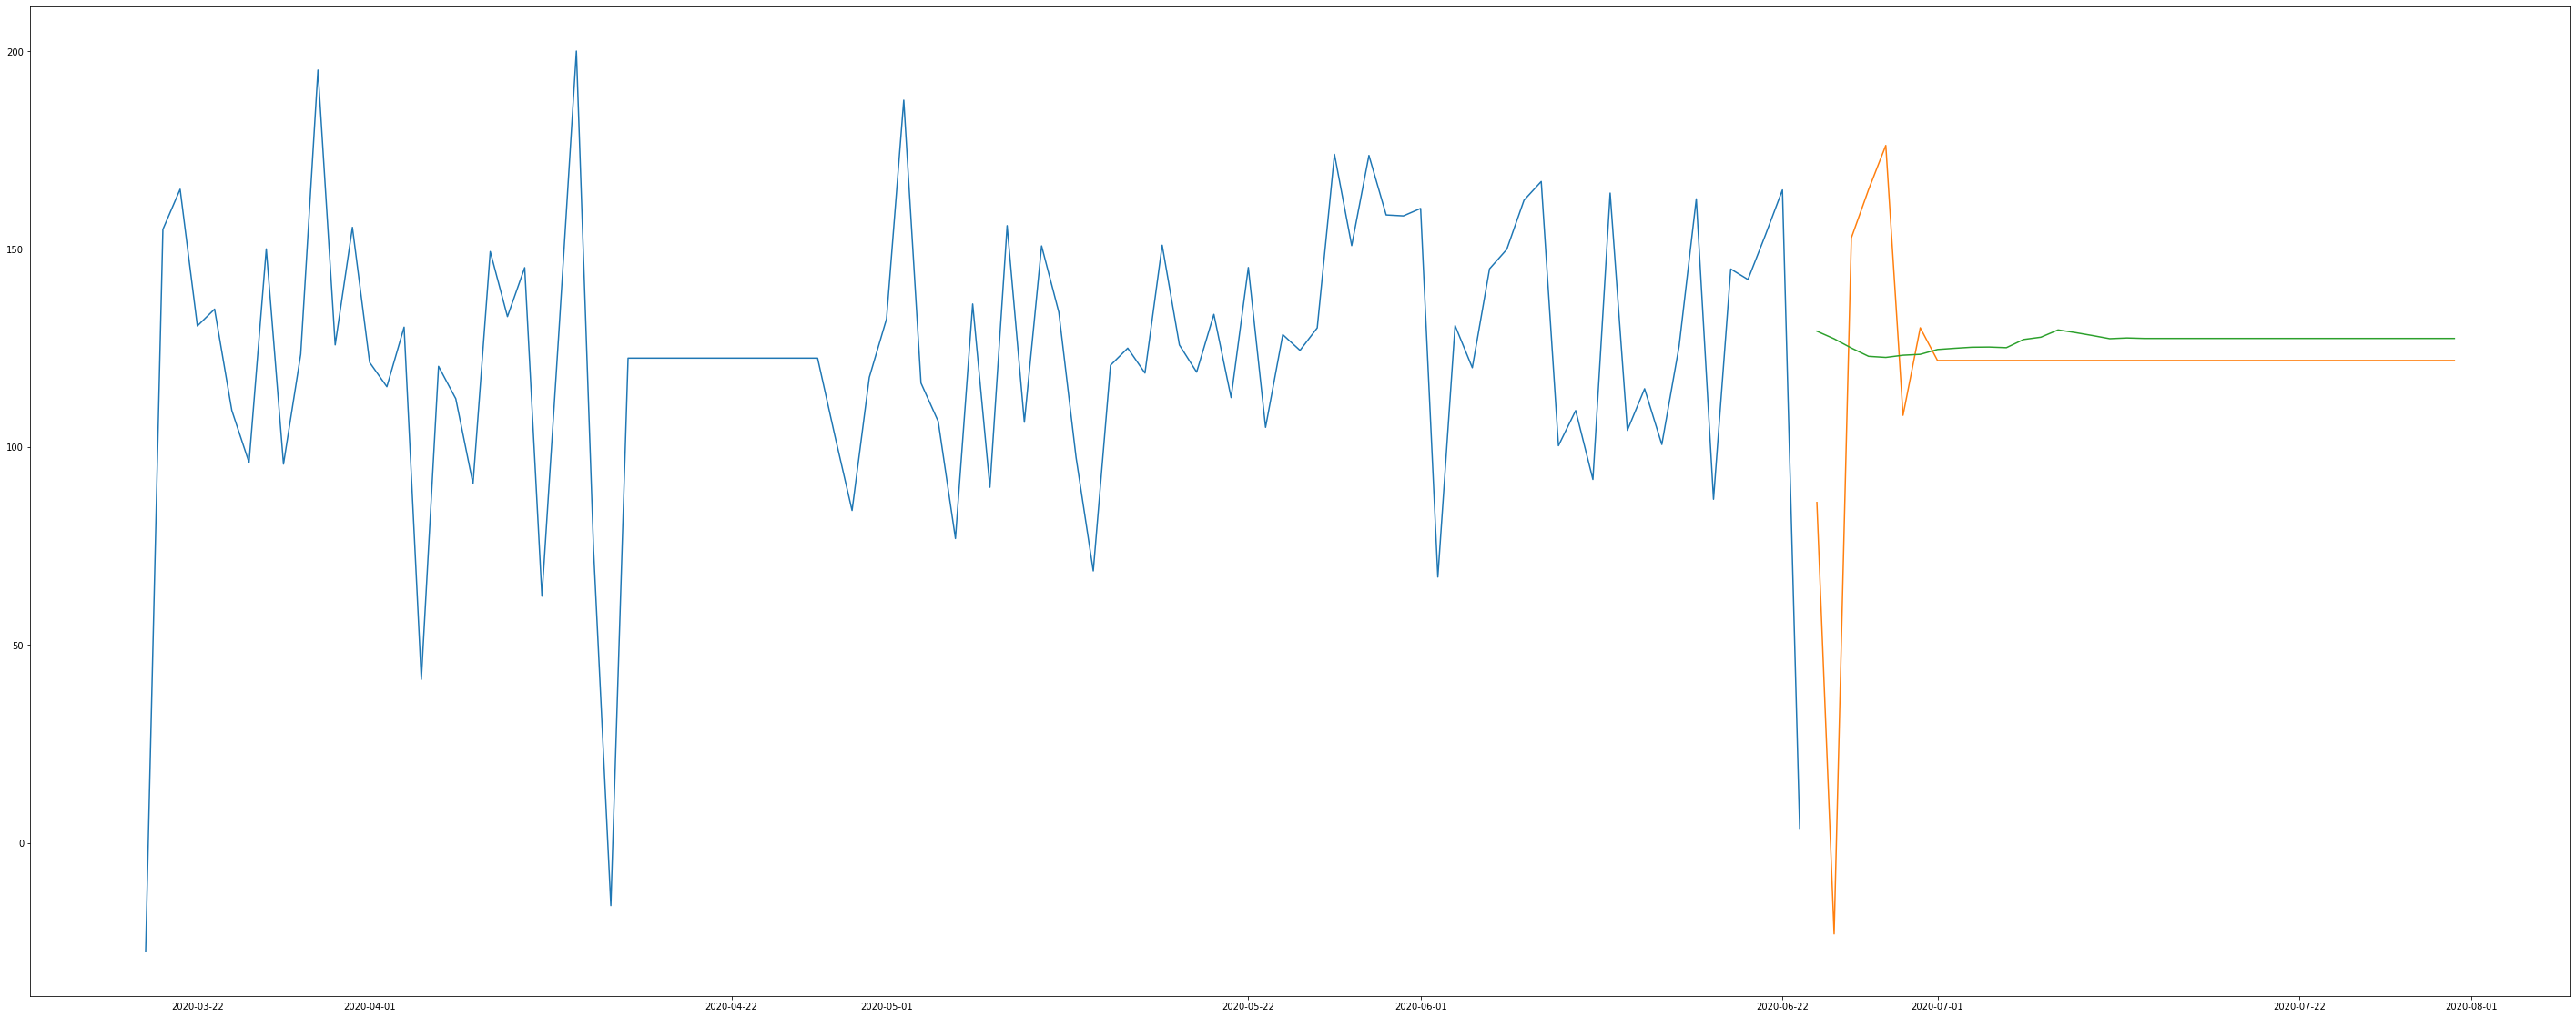

In [73]:
#for plotting
train = new_data[:97]
valid = new_data[97:]
valid['Predictions'] = closing_price
plt.figure(figsize=(50,20))
plt.plot(train['sentimental_values'])
plt.plot(valid[['sentimental_values','Predictions']])

In [72]:
valid[['sentimental_values','Predictions']]

,sentimental_values,Predictions
created_at,,
2020-06-24,86,129.241104
2020-06-25,-22.98,127.318863
2020-06-26,152.8,124.987862
2020-06-27,165,122.894348
2020-06-28,176.15,122.618279
2020-06-29,108,123.170845
2020-06-30,130.1,123.393394
2020-07-01,121.839,124.612427
2020-07-02,121.839,124.920547
